# Board games object tracking

Add the video files from shared [folder](https://drive.google.com/drive/folders/1CAKG0U1ZXzRS02MkrOCM3pTlMjBN6GFb?usp=share_link)

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import sys
import glob
import random

from pprint import pprint
from IPython.display import Video

from PIL import Image
from PIL.ExifTags import TAGS

paths = glob.glob('./data/*.mp4')
paths
# for name in os.listdir('./data/'):
#   x = name[:-4].split('_')
#   print(x)
from scipy.signal import convolve


In [26]:
if 'google.colab' in str(get_ipython()):
  from google.colab.patches import cv2_imshow
  imshow = cv2_imshow
else:
  def imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
      if a.shape[2] == 4:
        a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
      else:
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))


## Catan

In [82]:
video = cv2.VideoCapture(paths[0])
if video.isOpened():
    print('Video loaded')
video_width = int(video.get(3))
video_height = int(video.get(4))

print(video_height, video_width)

video_fps = video.get(cv2.CAP_PROP_FPS)
print(video_fps)


Video loaded
1088 1920
29.999212150015158


In [83]:
# Video('./data/catan_lvl1_1.mp4', height=540, width=960)

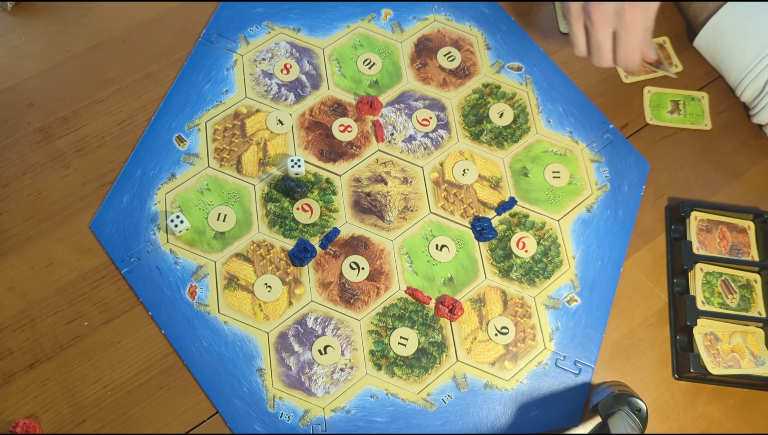

In [84]:
first_frame = None
while True:
    ret, frame = video.read()
    if ret:
        imshow(cv2.resize(frame, None, fx=0.4, fy=0.4))
        first_frame = frame
        break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
first_frame = cv2.resize(first_frame, None,fx=0.4, fy=0.4)

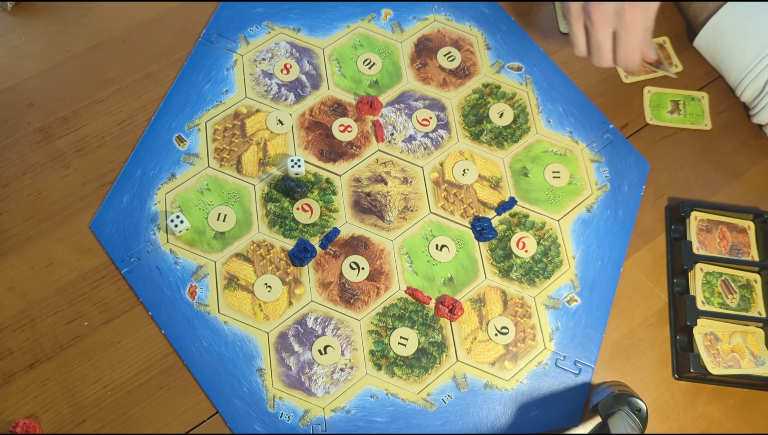

In [9]:
imshow(cv2.resize(first_frame, None, fx=0.4, fy=0.4))


In [10]:
def segment_by_blue(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    return mask

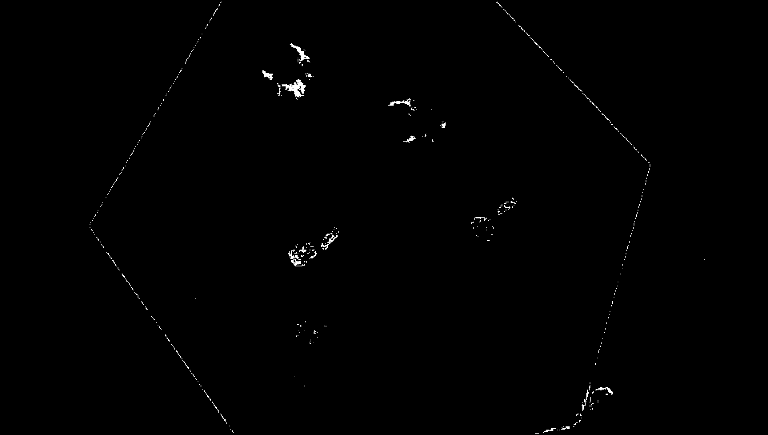

In [11]:
imshow(cv2.resize(segment_by_blue(first_frame), None, fx=0.4, fy=0.4))

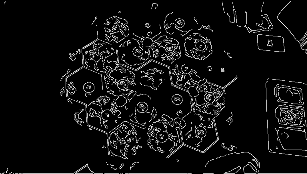

In [68]:
def detect_edges(frame, low_threshold=70, high_threshold=190):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blur, low_threshold, high_threshold, apertureSize=3)
    return edges


imshow(cv2.resize(detect_edges(first_frame), None, fx=0.4, fy=0.4))


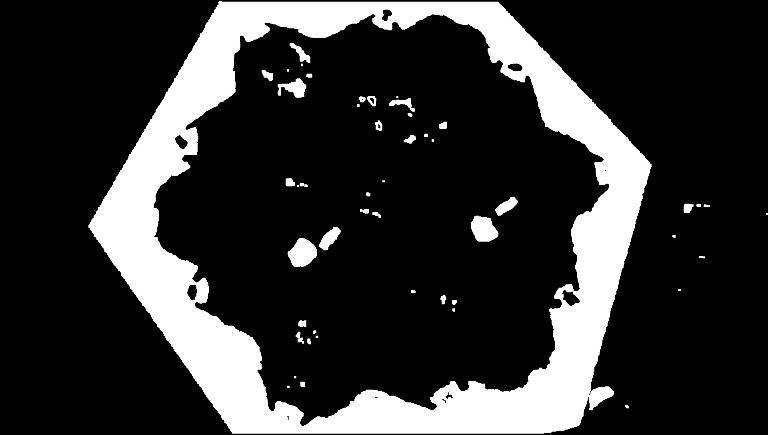

In [10]:
hsv = cv2.cvtColor(first_frame, cv2.COLOR_BGR2HSV)
blur = cv2.GaussianBlur(hsv, (7, 7), 0)
blue = cv2.inRange(blur, (100, 50, 50), (140, 255, 255))
# eroded = cv2.erode(blue, np.ones((7,7), np.uint8), iterations=3)
dilated = cv2.dilate(blue, np.ones((3, 3), np.uint8), iterations=2)
imshow(cv2.resize(dilated, None, fx=0.4, fy=0.4))


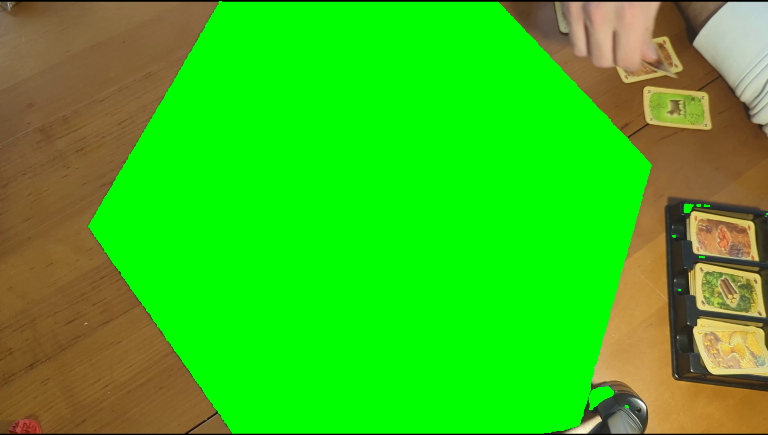

In [11]:
contours, hierarchy = cv2.findContours(dilated,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
new = first_frame.copy()
filled = cv2.drawContours(new, contours, -1, (0,255,0), -3)
imshow(cv2.resize(filled, None, fx=0.4, fy=0.4))


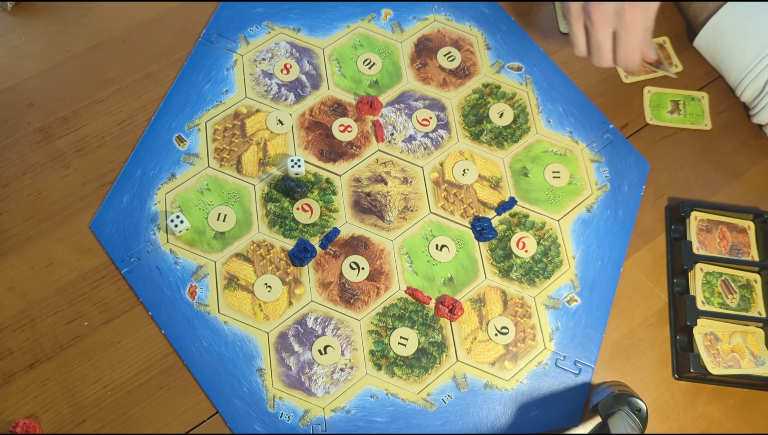

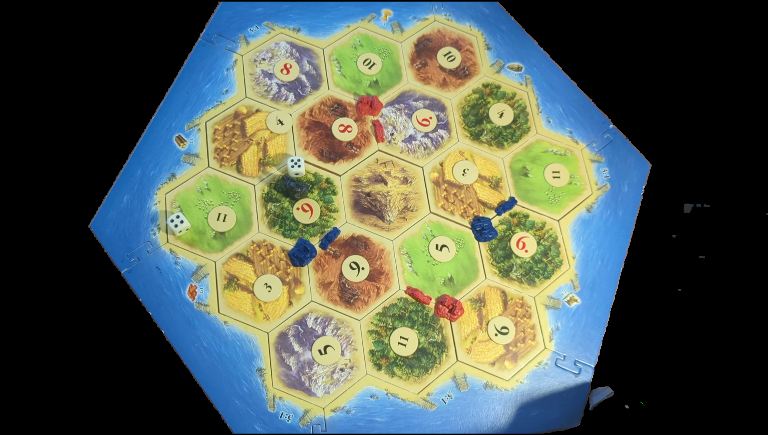

In [12]:
new = first_frame.copy()
imshow(cv2.resize(new, None, fx=0.4, fy=0.4))
new[filled != [0,255,0]] = 0
# new[dilated > 0] = 0
imshow(cv2.resize(new, None, fx=0.4, fy=0.4))


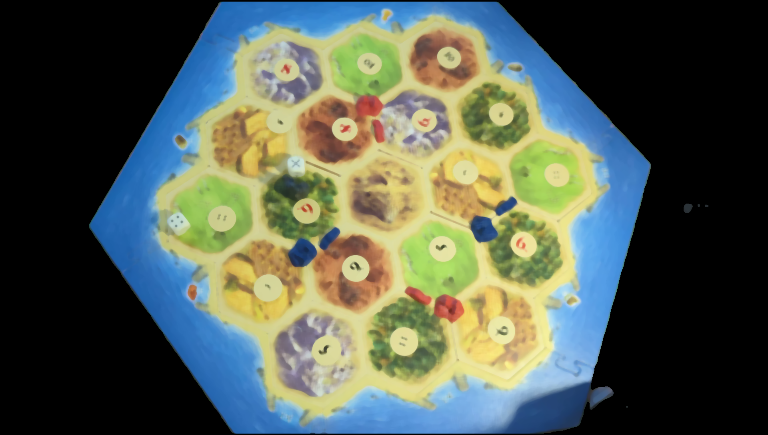

In [13]:
median = cv2.medianBlur(new, 11)
imshow(cv2.resize(median, None, fx=0.4, fy=0.4))

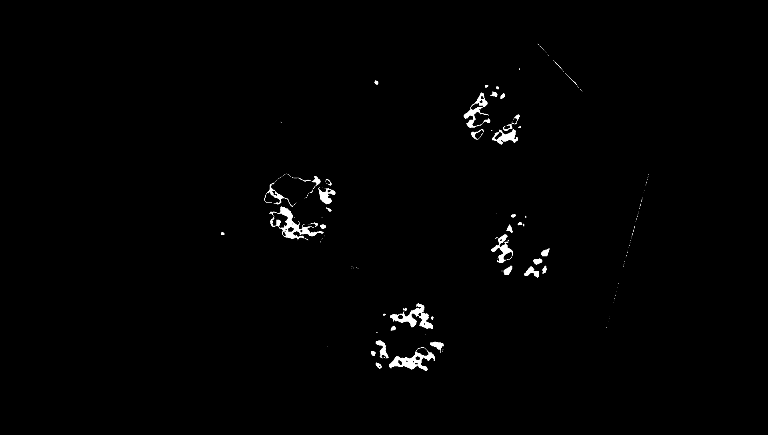

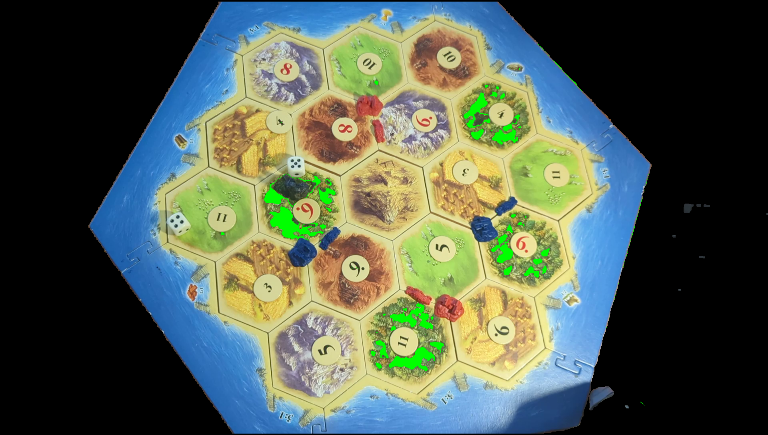

In [14]:
green = cv2.inRange(median, (0, 100, 0), (100, 255, 100))
imshow(cv2.resize(green, None, fx=0.4, fy=0.4))
contours, hierarchy = cv2.findContours(green,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
color1 = new.copy()
filled2 = cv2.drawContours(color1, contours, -1, (0, 255, 0), -3)
imshow(cv2.resize(filled2, None, fx=0.4, fy=0.4))


Pomysły na Catan:
- wykrywanie pionków kolor + template matching
- wykrywanie pól na planszy znajdując krawędzie i sześciokąty - wziąć największe
- każdy z sześcianów kolorem/template matchingiem dopasować do typu
- wykryć koła używając Hough Circle, z kół liczby prostym OCR - tesserac?
- wykryć kostki i nr na nich
- dopasować cyfry do rodzaju pola
- dopasować nr na kostce do rodzaju pola
- dopasowac pionki do pól
- mierzenie dróg
- rozpoznawanie typu pionka - użycie convex hull i jego kształtu

## Cyclade

In [31]:
paths[2]

'./data\\cyklady_lvl1_2.mp4'

In [206]:
video = cv2.VideoCapture(paths[2])
if video.isOpened():
    print('Video loaded')
video_width = int(video.get(3))
video_height = int(video.get(4))

print(video_height, video_width)

video_fps = video.get(cv2.CAP_PROP_FPS)
print(video_fps)


Video loaded
1080 1920
29.997545821220832


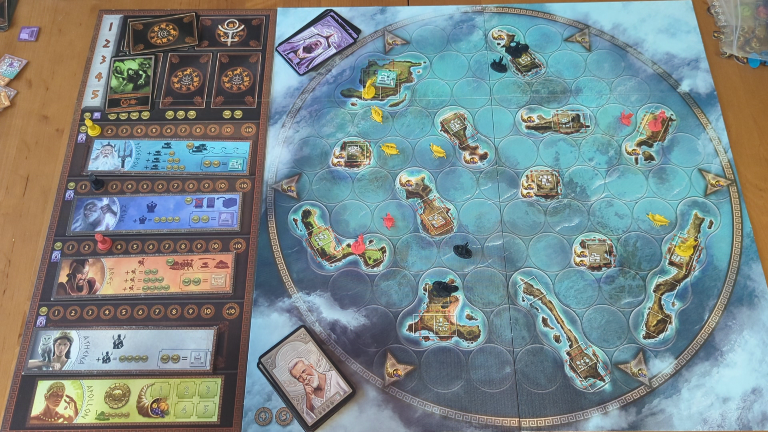

In [207]:
first_frame2 = None
i = 0
while True:
    ret, frame = video.read()
    i += 1
    if ret:
        if i == 10*60:
            imshow(cv2.resize(frame, None, fx=0.4, fy=0.4))
            first_frame2 = frame
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
i
first_frame2 = cv2.resize(first_frame2, None, fx=0.4, fy=0.4)

### Trying to divide board on 2 parts

In [195]:
g = np.ones((3,3))/9
g2 = -np.ones((3,3))/9

#g= np.array([[1/3,0],[1/3,0],[1/3,0]])
#g2= np.array([[0,-1/3],[0,-1/3],[0,-1/3]])

fg_cv = cv2.filter2D(first_frame2[:,:,0], -1, g)
fg_cv2 = cv2.filter2D(first_frame2[:,:,2].astype(g2.dtype), -1, g2)

In [196]:
g.shape

(3, 3)

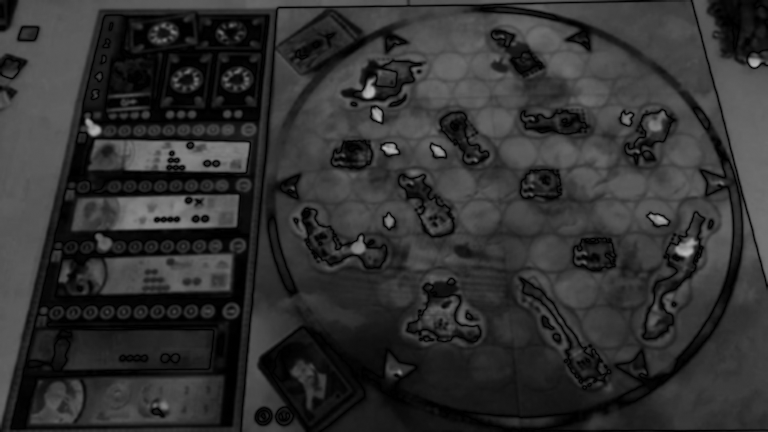

In [197]:
imshow(np.abs(fg_cv + fg_cv2))

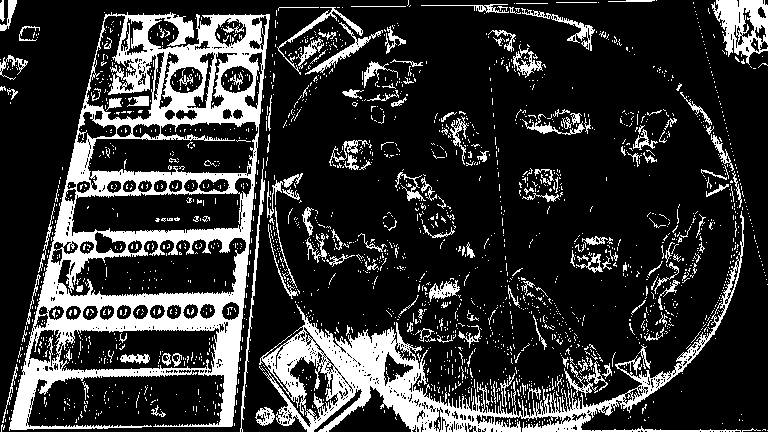

In [194]:
imshow((np.abs(fg_cv + fg_cv2) < 20)* 255)

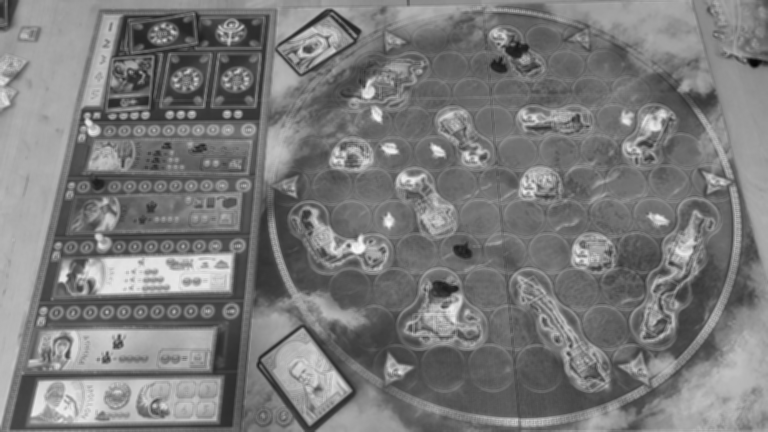

In [165]:
imshow(np.abs(fg_cv2))

In [231]:
import math
filtered = ((np.abs(fg_cv + fg_cv2) < 20)* 255).astype(np.uint8)

lines = cv2.HoughLines(filtered, 1, np.pi / 180, 400, None, 0, 0) # 400 is number of intersections it should be very high  to catch just the interesting line
#! or maybe there is a way to count the intersection
dst = first_frame2.copy()
if lines is not None:
    for i in range(1,len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(dst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

In [228]:
lines.shape

(2, 1, 2)

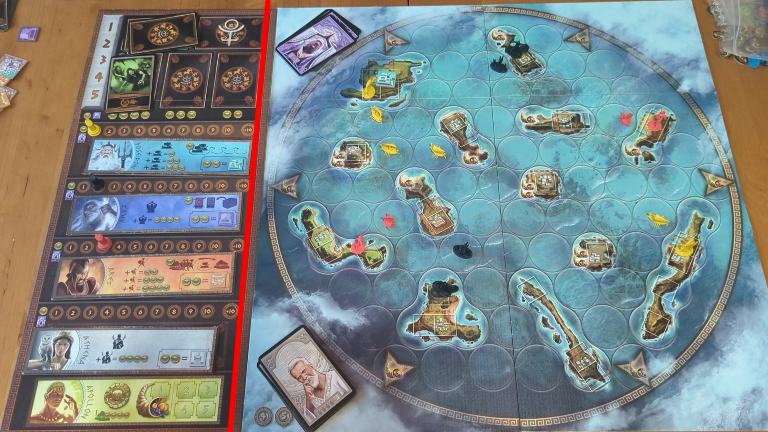

In [229]:
imshow(dst)

### Find circles

In [268]:
#g = np.ones((3,3))/9
#g2 = -np.ones((3,3))/9

g= np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])
# g2 = np.array([
#     [0,0,0],
#     [0,0,-1/3],
#     [0,-1/3,0]
# ])

fg_cv = cv2.filter2D(first_frame2[:,:,2], -1, g)
#fg_cv2 = cv2.filter2D(first_frame2[:,:,0].astype(g2.dtype), -1, g2)

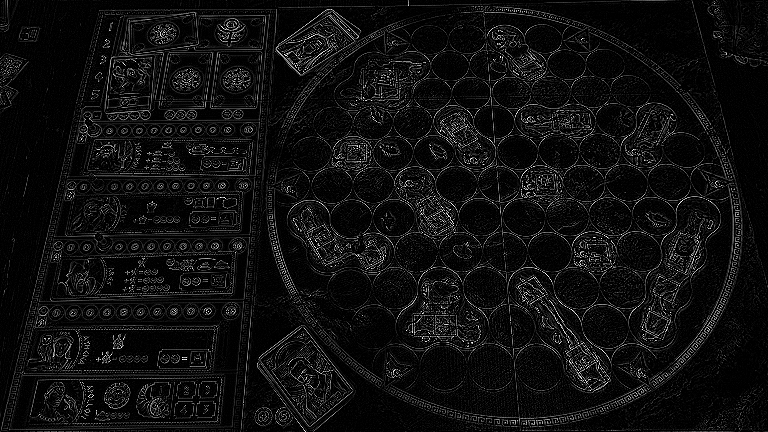

In [269]:
imshow(fg_cv)

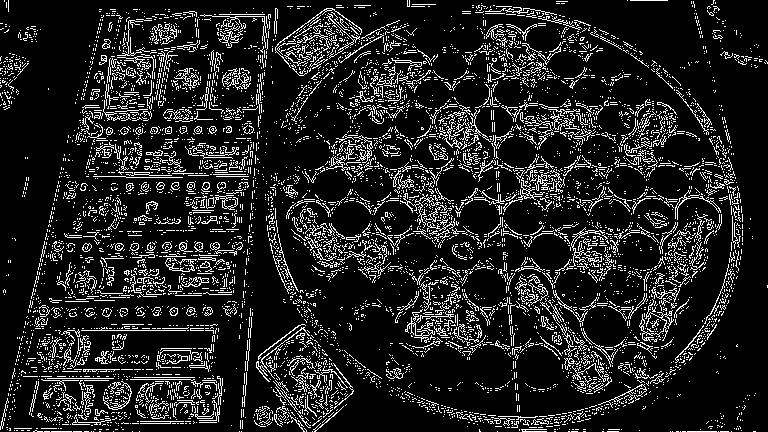

In [300]:
imshow(cv2.Canny(fg_cv, 200,200, apertureSize=3))

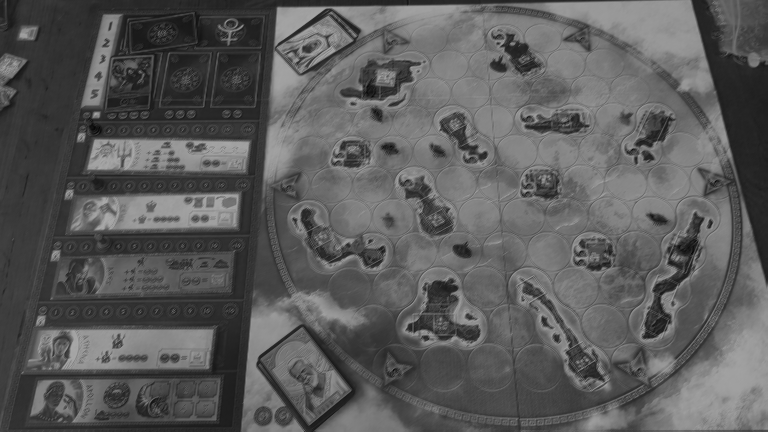

In [257]:
imshow(np.abs(fg_cv2))

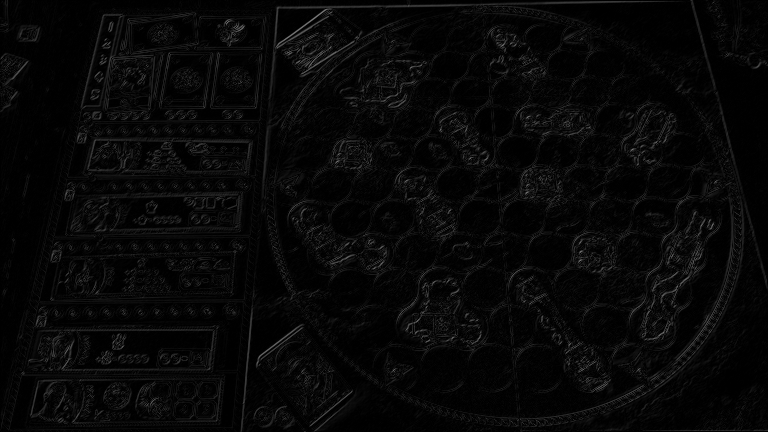

In [259]:
imshow((np.abs(fg_cv + fg_cv2))) #> 30) * 255)

In [287]:
def find_circles(frame, **kwargs):
    cframe = frame.copy()
    #gray = cv2.cvtColor(cframe, cv2.COLOR_BGR2GRAY)
    #blur = cv2.GaussianBlur(gray, (3, 3), 0)
    circles = cv2.HoughCircles(
        cframe, cv2.HOUGH_GRADIENT, 1, **kwargs)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cframe, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # draw the center of the circle
        cv2.circle(cframe, (i[0], i[1]), 2, (0, 0, 255), 3)
    return cframe

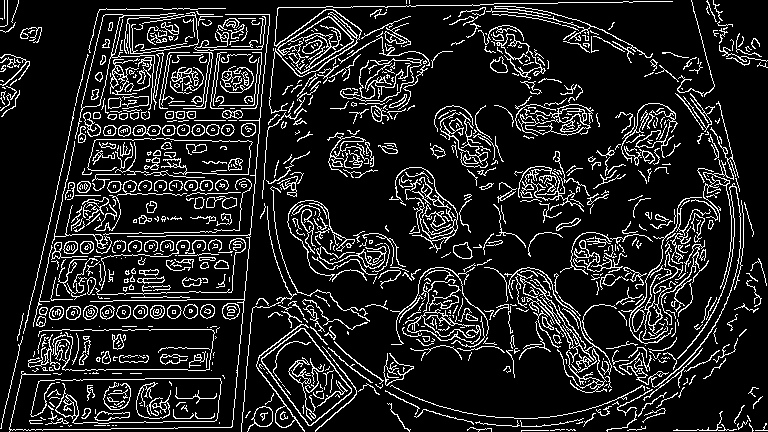

In [289]:
imshow(detect_edges(first_frame2, 50,100)) # Firs part of hough circles is canny edge detection so this is a good  idea to visualize how this would look to Circle detector

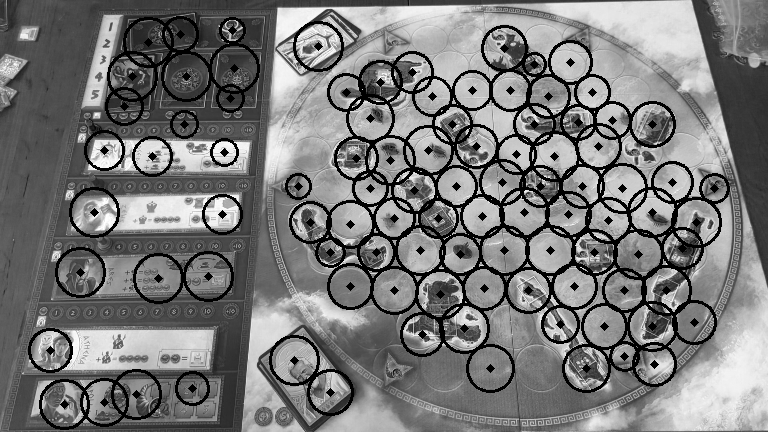

In [303]:
imshow(find_circles(first_frame2[:,:,0], minDist=30, param1=150, param2=20, minRadius=10, maxRadius=25))


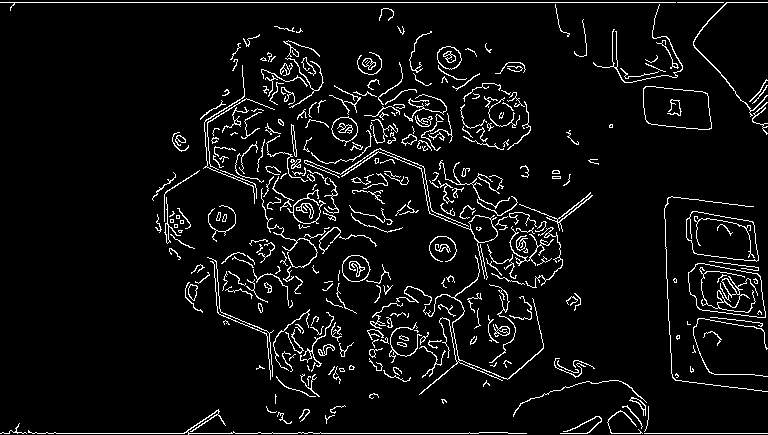

In [113]:
imshow(detect_edges(first_frame, 90,180)) # Firs part of hough circles is canny edge detection so this is a good  idea to visualize how this would look to Circle detector

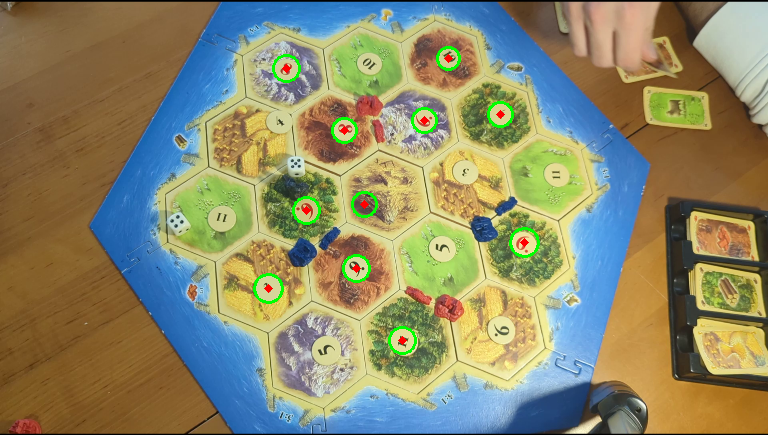

In [114]:
imshow(find_circles(first_frame, minDist=20, param1=180, param2=15, minRadius=10, maxRadius=15))


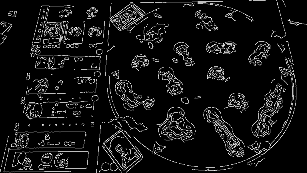

In [112]:
imshow(cv2.resize(detect_edges(first_frame2), None, fx=0.4, fy=0.4))


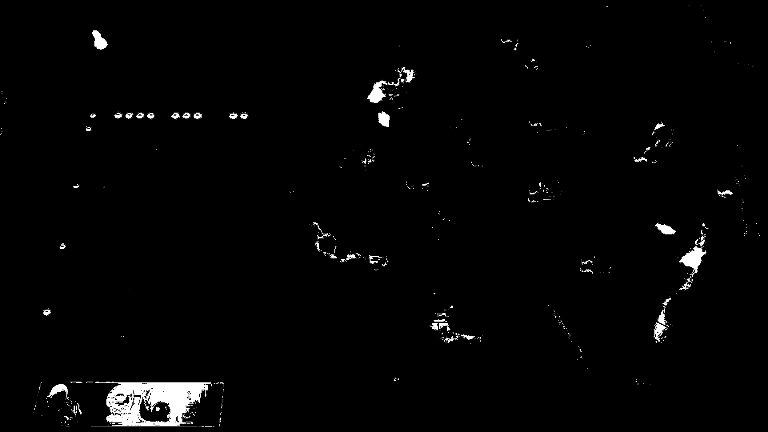

In [59]:
def segment_by_yellow(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    return mask

imshow(cv2.resize(segment_by_yellow(first_frame2), None, fx=0.4, fy=0.4))

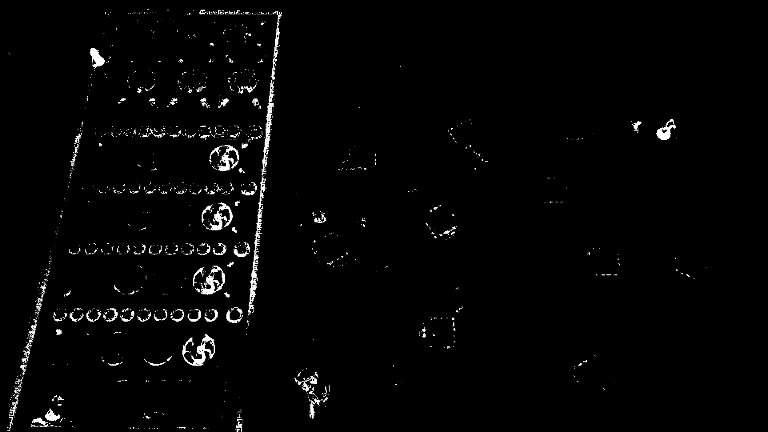

In [72]:
def segment_by_red(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    return mask


imshow(cv2.resize(segment_by_red(first_frame2), None, fx=0.4, fy=0.4))
